In [ ]:
# Team Members

# Pooja Goyal
# Roshan Sah
# Sanjib Paudel
# Sourabh Yadav

In [6]:
# Import all libraries
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import joblib

from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [7]:
def concatFiles(fileType): 
    files = os.path.join("datasets", fileType+"*.csv")
    files = glob.glob(files)
    return pd.concat(map(pd.read_csv, files), ignore_index=True)

ar_files = concatFiles('ar')
mc_files = concatFiles('mc')
pc_files = concatFiles('pc')
cm_files = concatFiles('cm')
kc_files = concatFiles('kc')

In [8]:
# Load data
ar_data = pd.DataFrame(ar_files)
mc_data = pd.DataFrame(mc_files)
pc_data = pd.DataFrame(pc_files)
cm_data = pd.DataFrame(cm_files)
kc_data = pd.DataFrame(kc_files)
print('ar_data:', ar_data.shape)
print('mc_data:', mc_data.shape)
print('pc_data:', pc_data.shape)
print('cm_data:', cm_data.shape)
print('kc_data:', kc_data.shape)

ar_data: (428, 31)
mc_data: (9627, 41)
pc_data: (9160, 60)
cm_data: (498, 22)
kc_data: (2631, 22)


In [9]:
ar_data.head()

,id,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,1,103,61,3,0,39,26,19,81,111,...,7,1,8,0.20513,1.1429,2.0,0.25,0.07767,0.0,False
1,2,53,22,5,0,26,18,16,38,54,...,5,2,5,0.19231,1.2000,0.0,0.00,0.09434,1.0,False
2,3,25,10,1,0,14,12,14,42,58,...,1,0,2,0.14286,1.0000,0.0,0.00,0.08000,2.0,False
3,4,73,22,8,1,43,25,12,67,97,...,15,7,9,0.20930,1.0000,0.0,0.00,0.12329,0.0,False
4,5,69,21,17,0,31,16,9,28,48,...,13,6,8,0.25806,1.0000,0.0,0.00,0.11594,0.0,False


In [10]:
mc_data.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,1,12,7,0,0,16,12,4,0.10,6,...,14,0.06,53,79,11,14,69,29.09,39,False
1,2,10,13,2,0,11,24,7,0.29,12,...,21,0.15,38,67,21,19,47,31.43,24,True
2,3,15,1,1,0,13,0,1,0.05,0,...,3,0.02,62,66,32,10,51,38.24,21,False
3,4,5,1,1,4,2,0,1,0.11,0,...,4,0.06,16,28,7,9,18,54.55,9,False
4,5,50,89,8,12,75,156,45,0.21,68,...,138,0.13,421,616,93,30,344,29.79,217,True


In [11]:
pc_data.insert(len(pc_data.columns)-1, 'defects', pc_data.pop('defects'))
pc_data.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.0,17.0,11.0,5.0,2.0,8.0,20.0,6.0,0.25,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2.0,2.0,9.0,3.0,0.0,1.0,16.0,5.0,0.56,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,3.0,2.0,5.0,1.0,1.0,1.0,6.0,3.0,0.17,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4.0,4.0,5.0,1.0,0.0,0.0,8.0,3.0,0.30,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,5.0,7.0,5.0,1.0,3.0,0.0,0.0,3.0,0.15,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [12]:
cm_data.head()

,loc,vg,evg,ivg,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [13]:
kc_data.head()

,loc,vg,evg,ivg,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47.0,106.0,692.0,467.0,106.0,True
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23.0,67.0,343.0,232.0,65.0,True
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18.0,58.0,310.0,190.0,51.0,True


In [14]:
# Check if any value is null
def checkIfValueIsNull(data):
    isAnyValueNull = data.isnull().values.any()
    return isAnyValueNull

print('is Any Value Null for ar_data: ', checkIfValueIsNull(ar_data))
print('is Any Value Null for mc_data: ', checkIfValueIsNull(mc_data))
print('is Any Value Null for pc_data: ', checkIfValueIsNull(pc_data))
print('is Any Value Null for cm_data: ', checkIfValueIsNull(cm_data))
print('is Any Value Null for kc_data: ', checkIfValueIsNull(kc_data))


is Any Value Null for ar_data:  False
is Any Value Null for mc_data:  True
is Any Value Null for pc_data:  True
is Any Value Null for cm_data:  False
is Any Value Null for kc_data:  False


In [15]:
# Pre-processing Data
def pre_process_data(data):
    if checkIfValueIsNull(data):
        data = data.dropna()
    if data.shape[0] > 0:
        data_X = data.drop(['defects'], axis=1)
        data_y = data['defects']
        X_train1, X_test, y_train1, y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state=1)

        sm = SMOTE(random_state=1)
        X_train2, y_train2 = sm.fit_sample(X_train1, y_train1)

        X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train2, test_size = .1, random_state=1)

        combined_training_data = X_train.copy()
        combined_training_data['defects'] = y_train

        return data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, X_test, X_val, y_train1, y_train2, y_train, y_test, y_val
    else:
        return False

In [16]:
def plot_loss_accuracy_graph(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


In [40]:
# Predict Test Data
def predict_test_tata(model, X_val, y_val):
    # Predict the output of test data from trained model
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)
    y_pred = pd.DataFrame(y_pred, columns=['defects'])
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    # Calculate the accuracy between actual output and predicted output
    return accuracy_score(y_val, y_pred)

In [41]:
# model train
def neural_network(filename, X_val, y_val):   
    model = Sequential()
    # First hidden layer
    model.add(Dense(units = 16, activation = 'relu', input_dim = len(data_X.columns)))
    # Second hidden layer
    model.add(Dense(units = 8, activation = 'relu'))
    # Third hidden layer
    model.add(Dense(units = 4, activation = 'relu'))
    # Output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    
    # Compiling Artificial Neural Network
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    history = model.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_val, y_val))
    
    model.save(
        "trained/"+filename+".h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )
    
    plot_loss_accuracy_graph(history)

In [42]:
dotfile = six.StringIO()

def save_graph(model, filename):
    for tree_in_forest in model.estimators_:
        export_graphviz(tree_in_forest,out_file=filename+'.dot',
        feature_names=data_X.columns,
        filled=True,
        rounded=True)
        (graph,) = pydot.graph_from_dot_file(filename+'.dot')
        graph.write_png('images/'+filename+'.png')

In [43]:
# Predict test result of neural network
# Load saved model
def test_nn_model(filename, X_val, y_val):
    model = keras.models.load_model("trained/"+filename+".h5")
    print('Test Accuracy or Neural Network', predict_test_tata(model, X_val, y_val))

In [21]:
def random_forest(filename):
    model = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
    model.fit(X_train, y_train)
    joblib.dump(model, "trained/"+filename+".h5")
    save_graph(model, filename)

In [22]:
def display_tree(filename):
    img = image.imread("images/"+filename+".png")
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()

In [45]:
# Predict test result of random forest
def test_rf_model(filename, X_val, y_val):
    model = joblib.load("trained/"+filename+".h5")
    print('Test Accuracy of Random Forest', predict_test_tata(model, X_val, y_val))

In [24]:
def svm(filename):
    model = SVC(gamma='auto')
    model.fit(X_train, y_train)
    joblib.dump(model, "trained/"+filename+".h5")

In [47]:
# Predict test result of svc
def test_svm_model(filename, X_val, y_val):
    model = joblib.load("trained/"+filename+".h5")
    print('Test Accuracy of SVC', predict_test_tata(model, X_val, y_val))

In [49]:
def cnn(filename, X_val, y_val):
    global X_val1
    X_train_matrix = X_train.values
    X_val_matrix = X_val.values
    y_train_matrix = y_train.values
    y_val_matrix = y_val.values
    
    y_train_series = y_train
    y_val_series = y_val
    
    img_rows, img_cols = 1,len(data_X.columns)
    
    X_train1 = X_train_matrix.reshape(X_train_matrix.shape[0], img_rows, img_cols, 1)
    X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    # Model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #train the model
    history = model.fit(X_train1, y_train_matrix, batch_size=16, epochs=100, validation_data=(X_val1, y_val_matrix))
    
    model.save(
        "trained/"+filename+".h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )
    
    plot_loss_accuracy_graph(history)

In [50]:
# Predict test result of convolutional neural network
# Load saved model
def test_cnn_model(filename, X_Val1, y_val):
    model = keras.models.load_model("trained/"+filename+".h5")
    print('Test Accuracy of CNN', predict_test_tata(model, X_val1, y_val))

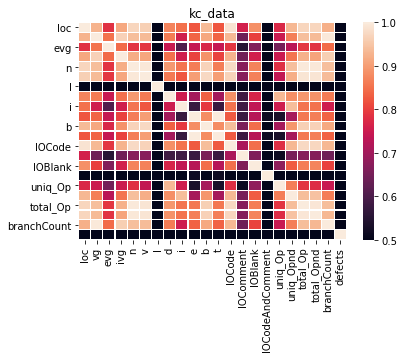

In [35]:
if pre_process_data(kc_data):
    data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, kc_X_test, kc_X_val, y_train1, y_train2, y_train, kc_y_test, kc_y_val = pre_process_data(kc_data)
    # Heat map of pre processing data
    corr = combined_training_data.corr()
    ax = sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)
    ax.set_title('kc_data')
else:
    print('No Data available for training')

Epoch 1/100
222/222 [==============================] - 1s 1ms/step - loss: 99.2414 - accuracy: 0.6238 - val_loss: 0.6219 - val_accuracy: 0.6684
Epoch 2/100
222/222 [==============================] - 0s 887us/step - loss: 0.6164 - accuracy: 0.6914 - val_loss: 0.6089 - val_accuracy: 0.6608
Epoch 3/100
222/222 [==============================] - 0s 873us/step - loss: 0.6040 - accuracy: 0.6914 - val_loss: 0.5971 - val_accuracy: 0.6658
Epoch 4/100
222/222 [==============================] - 0s 875us/step - loss: 0.5977 - accuracy: 0.6899 - val_loss: 0.5957 - val_accuracy: 0.6684
Epoch 5/100
222/222 [==============================] - 0s 896us/step - loss: 0.5911 - accuracy: 0.6928 - val_loss: 0.5879 - val_accuracy: 0.6734
Epoch 6/100
222/222 [==============================] - 0s 903us/step - loss: 0.5867 - accuracy: 0.6919 - val_loss: 0.5930 - val_accuracy: 0.6633
Epoch 7/100
222/222 [==============================] - 0s 903us/step - loss: 0.5843 - accuracy: 0.6925 - val_loss: 0.5844 - val_acc

222/222 [==============================] - 0s 888us/step - loss: 0.5229 - accuracy: 0.7494 - val_loss: 0.5291 - val_accuracy: 0.7316
Epoch 58/100
222/222 [==============================] - 0s 899us/step - loss: 0.5330 - accuracy: 0.7384 - val_loss: 0.5394 - val_accuracy: 0.7139
Epoch 59/100
222/222 [==============================] - 0s 903us/step - loss: 0.5264 - accuracy: 0.7496 - val_loss: 0.5200 - val_accuracy: 0.7443
Epoch 60/100
222/222 [==============================] - 0s 911us/step - loss: 0.5248 - accuracy: 0.7426 - val_loss: 0.5260 - val_accuracy: 0.7291
Epoch 61/100
222/222 [==============================] - 0s 869us/step - loss: 0.5254 - accuracy: 0.7451 - val_loss: 0.5202 - val_accuracy: 0.7468
Epoch 62/100
222/222 [==============================] - 0s 887us/step - loss: 0.5250 - accuracy: 0.7429 - val_loss: 0.5282 - val_accuracy: 0.7468
Epoch 63/100
222/222 [==============================] - 0s 880us/step - loss: 0.5252 - accuracy: 0.7401 - val_loss: 0.5456 - val_accuracy

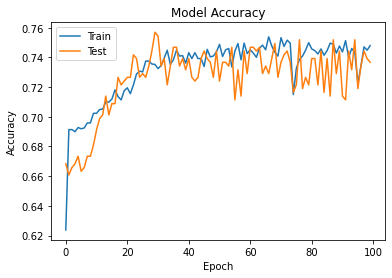

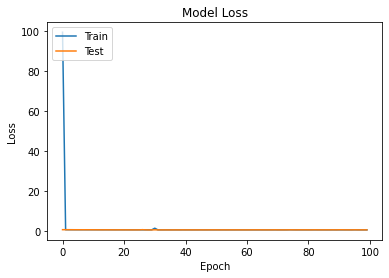

Test Accuracy or Neural Network 0.7367088607594937


In [44]:
neural_network('kc_nn', kc_X_val, kc_y_val)
test_nn_model('kc_nn', kc_X_val, kc_y_val)

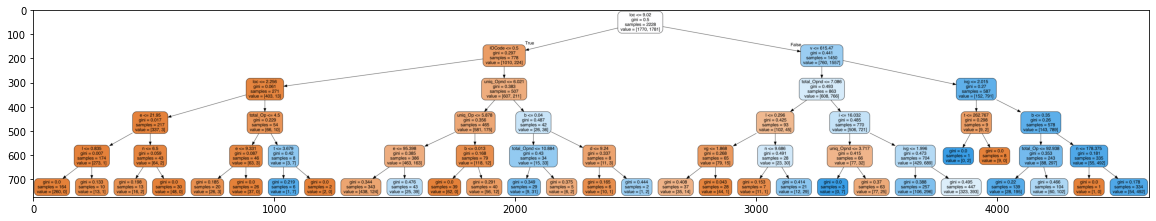

Test Accuracy of Random Forest 0.7468354430379747


In [46]:
random_forest('kc_rf')
display_tree('kc_rf')
test_rf_model('kc_rf', kc_X_val, kc_y_val)

In [48]:
svm('kc_svm')
test_svm_model('kc_svm', kc_X_val, kc_y_val)

Test Accuracy of SVC 0.779746835443038


Epoch 1/100
222/222 [==============================] - 1s 3ms/step - loss: 7.1832 - accuracy: 0.6697 - val_loss: 3.7525 - val_accuracy: 0.7392
Epoch 2/100
222/222 [==============================] - 0s 1ms/step - loss: 2.3851 - accuracy: 0.6671 - val_loss: 1.3309 - val_accuracy: 0.5392
Epoch 3/100
222/222 [==============================] - 0s 1ms/step - loss: 2.2542 - accuracy: 0.6745 - val_loss: 0.9100 - val_accuracy: 0.7519
Epoch 4/100
222/222 [==============================] - 0s 1ms/step - loss: 3.2201 - accuracy: 0.6818 - val_loss: 1.0665 - val_accuracy: 0.7038
Epoch 5/100
222/222 [==============================] - 0s 1ms/step - loss: 2.4195 - accuracy: 0.6531 - val_loss: 1.2747 - val_accuracy: 0.5316
Epoch 6/100
222/222 [==============================] - 0s 1ms/step - loss: 1.8774 - accuracy: 0.6838 - val_loss: 0.8868 - val_accuracy: 0.7570
Epoch 7/100
222/222 [==============================] - 0s 1ms/step - loss: 0.8587 - accuracy: 0.6956 - val_loss: 0.5490 - val_accuracy: 0.7038

Epoch 58/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7722 - val_loss: 0.4845 - val_accuracy: 0.7975
Epoch 59/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7756 - val_loss: 0.4860 - val_accuracy: 0.7823
Epoch 60/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7705 - val_loss: 0.4927 - val_accuracy: 0.7873
Epoch 61/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7784 - val_loss: 0.4844 - val_accuracy: 0.7772
Epoch 62/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7789 - val_loss: 0.4991 - val_accuracy: 0.7696
Epoch 63/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7784 - val_loss: 0.4837 - val_accuracy: 0.7823
Epoch 64/100
222/222 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.7761 - val_loss: 0.4838 - val_accuracy:

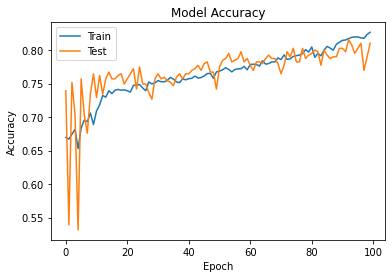

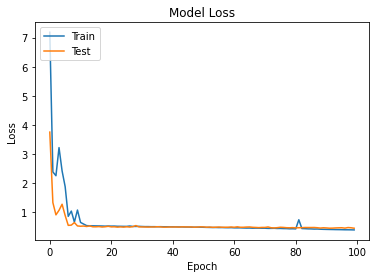

NameError: name 'kc_X_Val1' is not defined

In [53]:
cnn('kc_cnn', kc_X_val, kc_y_val)
test_cnn_model('kc_cnn', kc_X_Val1, kc_y_val)

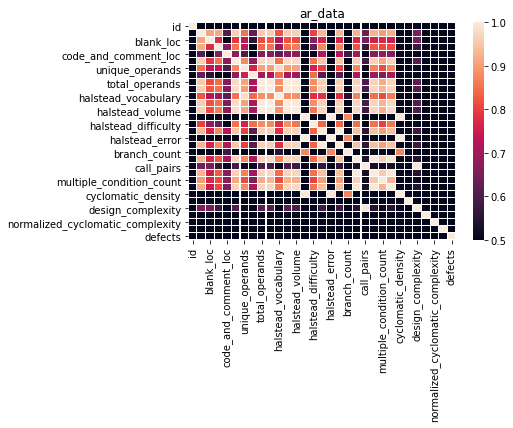

In [54]:
if pre_process_data(ar_data):
    data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, ar_X_test, ar_X_val, y_train1, y_train2, y_train, ar_y_test, ar_y_val = pre_process_data(ar_data)
    # Heat map of pre processing data
    corr = combined_training_data.corr()
    ax = sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)
    ax.set_title('ar_data')
else:
    print('No Data available for training')

Epoch 1/100
37/37 [==============================] - 0s 4ms/step - loss: 47.0191 - accuracy: 0.6216 - val_loss: 25.4076 - val_accuracy: 0.6515
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 15.4925 - accuracy: 0.5557 - val_loss: 19.3889 - val_accuracy: 0.5152
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 16.6394 - accuracy: 0.4966 - val_loss: 33.7289 - val_accuracy: 0.5455
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 18.4733 - accuracy: 0.6030 - val_loss: 15.8068 - val_accuracy: 0.6970
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 13.8774 - accuracy: 0.5895 - val_loss: 9.8707 - val_accuracy: 0.5909
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 19.7367 - accuracy: 0.5878 - val_loss: 93.2578 - val_accuracy: 0.5303
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 30.0260 - accuracy: 0.5895 - val_loss: 21.3086 - val_accuracy: 0.6970


37/37 [==============================] - 0s 1ms/step - loss: 7.9179 - accuracy: 0.6554 - val_loss: 17.6688 - val_accuracy: 0.6364
Epoch 59/100
37/37 [==============================] - 0s 1ms/step - loss: 6.2313 - accuracy: 0.6402 - val_loss: 4.4771 - val_accuracy: 0.7879
Epoch 60/100
37/37 [==============================] - 0s 1ms/step - loss: 2.5090 - accuracy: 0.6622 - val_loss: 2.7188 - val_accuracy: 0.7879
Epoch 61/100
37/37 [==============================] - 0s 1ms/step - loss: 5.3847 - accuracy: 0.6368 - val_loss: 5.4384 - val_accuracy: 0.7121
Epoch 62/100
37/37 [==============================] - 0s 1ms/step - loss: 2.4768 - accuracy: 0.6774 - val_loss: 6.3916 - val_accuracy: 0.5303
Epoch 63/100
37/37 [==============================] - 0s 1ms/step - loss: 5.6208 - accuracy: 0.6672 - val_loss: 2.3035 - val_accuracy: 0.6515
Epoch 64/100
37/37 [==============================] - 0s 1ms/step - loss: 2.3016 - accuracy: 0.6807 - val_loss: 2.0194 - val_accuracy: 0.5909
Epoch 65/100
37/37

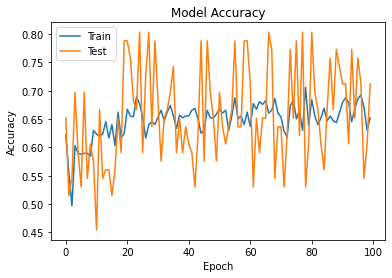

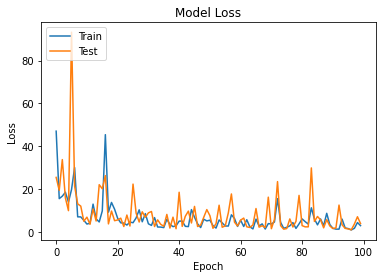

Test Accuracy or Neural Network 0.7121212121212122


In [55]:
neural_network('ar_nn', ar_X_val, ar_y_val)
test_nn_model('ar_nn', ar_X_val, ar_y_val)

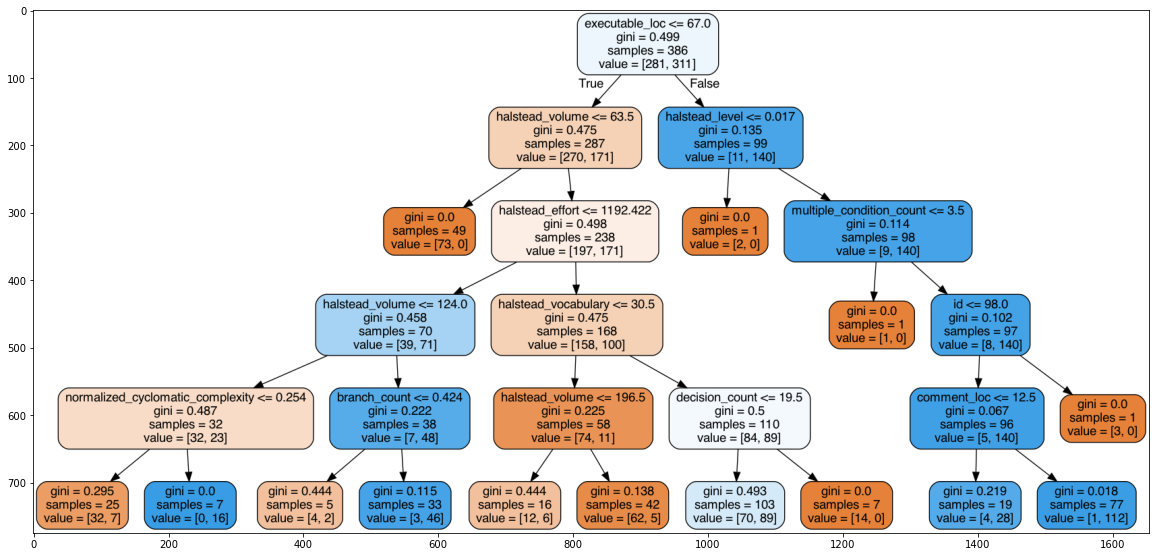

Test Accuracy of Random Forest 0.8484848484848485


In [57]:
random_forest('ar_rf')
display_tree('ar_rf')
test_rf_model('ar_rf', ar_X_val, ar_y_val)

In [58]:
svm('ar_svm')
test_svm_model('ar_svm', ar_X_val, ar_y_val)

Test Accuracy of SVC 0.5454545454545454


Epoch 1/100
37/37 [==============================] - 0s 5ms/step - loss: 8.9573 - accuracy: 0.5591 - val_loss: 5.6892 - val_accuracy: 0.6364
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 4.0513 - accuracy: 0.6351 - val_loss: 4.2651 - val_accuracy: 0.7727
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 2.1278 - accuracy: 0.6774 - val_loss: 3.1005 - val_accuracy: 0.5455
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 5.5075 - accuracy: 0.6571 - val_loss: 9.6184 - val_accuracy: 0.6212
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 2.8278 - accuracy: 0.6571 - val_loss: 1.2319 - val_accuracy: 0.6970
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 1.8656 - accuracy: 0.6655 - val_loss: 3.9251 - val_accuracy: 0.6818
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 2.1685 - accuracy: 0.6723 - val_loss: 2.0183 - val_accuracy: 0.7727
Epoch 8/100
3

Epoch 59/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7889 - val_loss: 0.4828 - val_accuracy: 0.6970
Epoch 60/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7838 - val_loss: 0.4803 - val_accuracy: 0.7273
Epoch 61/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.7872 - val_loss: 0.5974 - val_accuracy: 0.6970
Epoch 62/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7753 - val_loss: 0.4763 - val_accuracy: 0.6970
Epoch 63/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7922 - val_loss: 0.4734 - val_accuracy: 0.7273
Epoch 64/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7939 - val_loss: 0.4985 - val_accuracy: 0.7121
Epoch 65/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7905 - val_loss: 0.4780 - val_accuracy: 0.6970
Epoch 

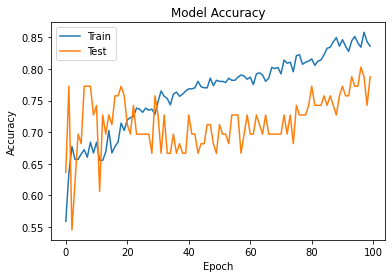

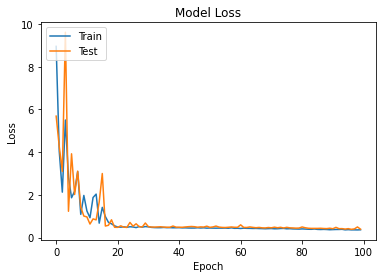

NameError: name 'ar_X_Val1' is not defined

In [59]:
cnn('ar_cnn', ar_X_val, ar_y_val)
test_cnn_model('ar_cnn', ar_X_Val1, ar_y_val)

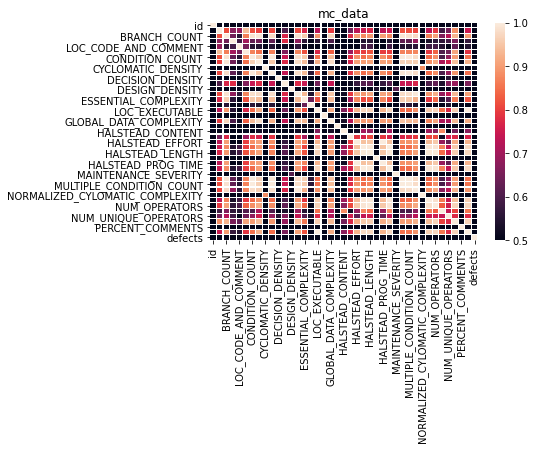

In [60]:
if pre_process_data(mc_data):
    data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, mc_X_test, mc_X_val, y_train1, y_train2, y_train, mc_y_test, mc_y_val = pre_process_data(mc_data)
    # Heat map of pre processing data
    corr = combined_training_data.corr()
    ax = sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)
    ax.set_title('mc_data')
else:
    print('No Data available for training')

Epoch 1/100
11/11 [==============================] - 0s 12ms/step - loss: 225.2344 - accuracy: 0.5000 - val_loss: 175.6461 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 160.6543 - accuracy: 0.5000 - val_loss: 118.6827 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 108.2390 - accuracy: 0.5000 - val_loss: 74.5820 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 55.4679 - accuracy: 0.5000 - val_loss: 40.6327 - val_accuracy: 0.5000
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 20.8188 - accuracy: 0.5114 - val_loss: 3.8395 - val_accuracy: 0.5000
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.4318 - val_loss: 1.0284 - val_accuracy: 0.3500
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7827 - accuracy: 0.4375 - val_loss: 0.9436 - val_accuracy: 0.350

11/11 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 64/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 65/100
11/11 

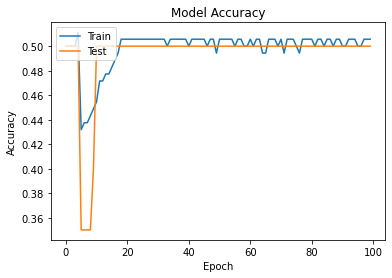

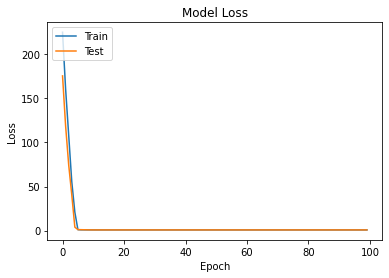

Test Accuracy or Neural Network 0.5


In [61]:
neural_network('mc_nn', mc_X_val, mc_y_val)
test_nn_model('mc_nn', mc_X_val, mc_y_val)

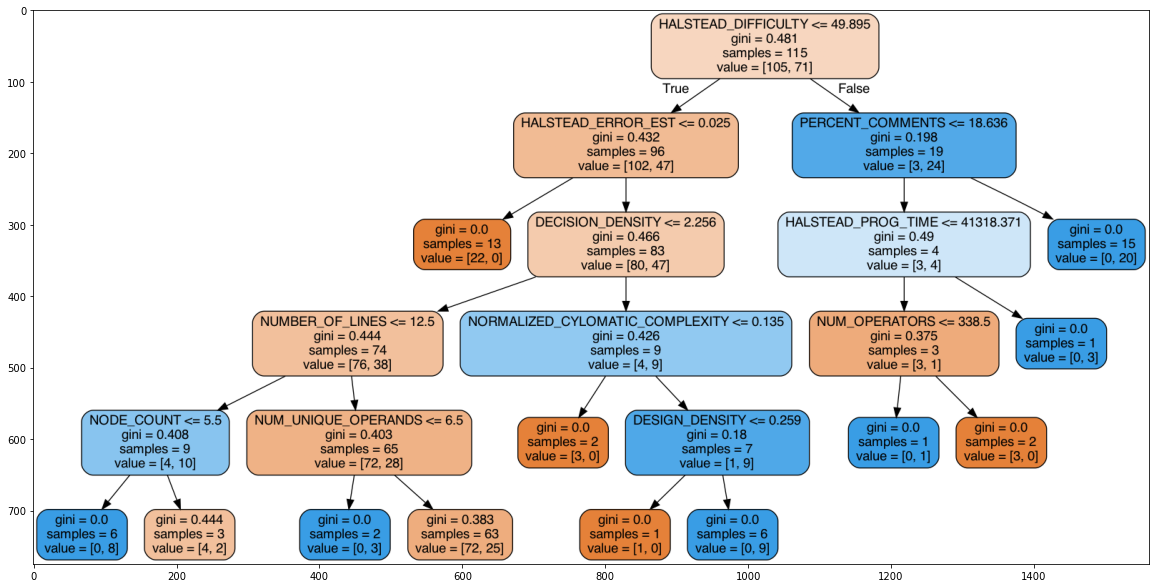

Test Accuracy of Random Forest 0.75


In [62]:
random_forest('mc_rf')
display_tree('mc_rf')
test_rf_model('mc_rf', mc_X_val, mc_y_val)

In [63]:
svm('mc_svm')
test_svm_model('mc_svm', mc_X_val, mc_y_val)

Test Accuracy of SVC 0.55


Epoch 1/100
11/11 [==============================] - 0s 14ms/step - loss: 445.9897 - accuracy: 0.4659 - val_loss: 8.9358 - val_accuracy: 0.5500
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 17.5876 - accuracy: 0.5455 - val_loss: 2.0241 - val_accuracy: 0.7500
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 7.9555 - accuracy: 0.5341 - val_loss: 29.9142 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 7.2322 - accuracy: 0.5284 - val_loss: 1.7835 - val_accuracy: 0.6000
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 3.9889 - accuracy: 0.5341 - val_loss: 6.5351 - val_accuracy: 0.3000
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 3.2708 - accuracy: 0.4943 - val_loss: 0.8799 - val_accuracy: 0.6000
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 3.1149 - accuracy: 0.5398 - val_loss: 10.2261 - val_accuracy: 0.3500
Epoch 8

Epoch 59/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7450 - accuracy: 0.7273 - val_loss: 0.7009 - val_accuracy: 0.7000
Epoch 60/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9496 - accuracy: 0.7159 - val_loss: 0.4499 - val_accuracy: 0.7500
Epoch 61/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9577 - accuracy: 0.7216 - val_loss: 1.8700 - val_accuracy: 0.7000
Epoch 62/100
11/11 [==============================] - 0s 3ms/step - loss: 1.2837 - accuracy: 0.6875 - val_loss: 0.6686 - val_accuracy: 0.8500
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 1.2547 - accuracy: 0.6705 - val_loss: 2.3973 - val_accuracy: 0.7000
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 1.2906 - accuracy: 0.6193 - val_loss: 4.5131 - val_accuracy: 0.4500
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0902 - accuracy: 0.7159 - val_loss: 0.4372 - val_accuracy: 0.7000
Epoch 

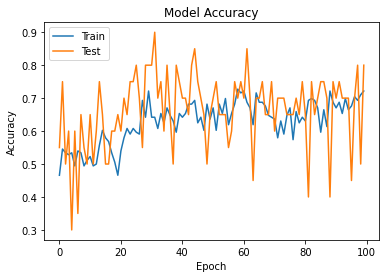

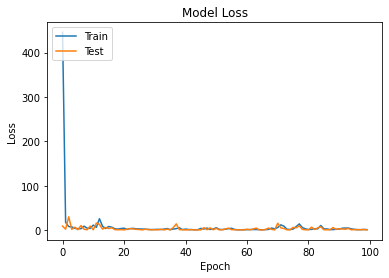

NameError: name 'mc_X_Val1' is not defined

In [64]:
cnn('mc_cnn', mc_X_val, mc_y_val)
test_cnn_model('mc_cnn', mc_X_Val1, mc_y_val)

In [65]:
if pre_process_data(pc_data):
    data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, pc_X_test, pc_X_val, y_train1, y_train2, y_train, pc_y_test, pc_y_val = pre_process_data(pc_data)
    # Heat map of pre processing data
    corr = combined_training_data.corr()
    ax = sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)
    ax.set_title('pc_data')
else:
    print('No Data available for training')

No Data available for training


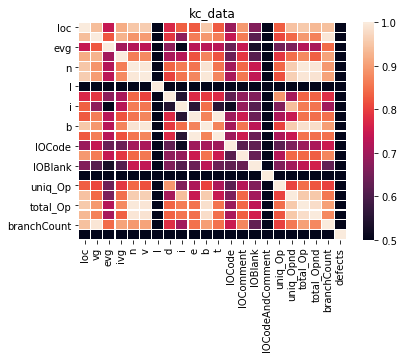

In [66]:
if pre_process_data(cm_data):
    data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, cm_X_test, cm_X_val, y_train1, y_train2, y_train, cm_y_test, cm_y_val = pre_process_data(cm_data)
    # Heat map of pre processing data
    corr = combined_training_data.corr()
    ax = sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)
    ax.set_title('kc_data')
else:
    print('No Data available for training')

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 113.3129 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5375
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.4958 - val_loss: 0.6934 - val_accuracy: 0.5375
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.4986 - val_loss: 0.6928 - val_accuracy: 0.5375
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4986 - val_loss: 0.6926 - val_accuracy: 0.5375
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4986 - val_loss: 0.6926 - val_accuracy: 0.5375
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4986 - val_loss: 0.6927 - val_accuracy: 0.5375
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.4986 - val_loss: 0.6928 - val_accuracy: 0.5375
Epoch 8/100

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6937 - val_accuracy: 0.4625
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6935 - val_accuracy: 0.4625
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5042 - val_loss: 0.6936 - val_accuracy: 0.4625
Epoch 

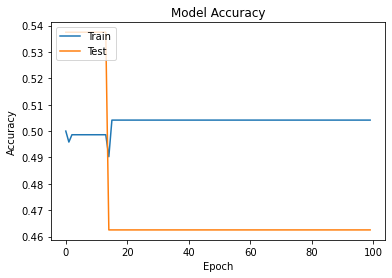

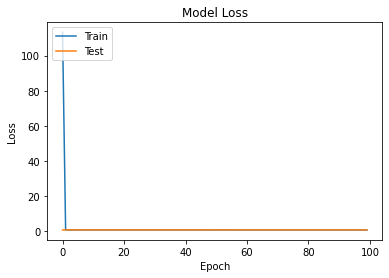

Test Accuracy or Neural Network 0.4625


In [67]:
neural_network('cm_nn', cm_X_val, cm_y_val)
test_nn_model('cm_nn', cm_X_val, cm_y_val)

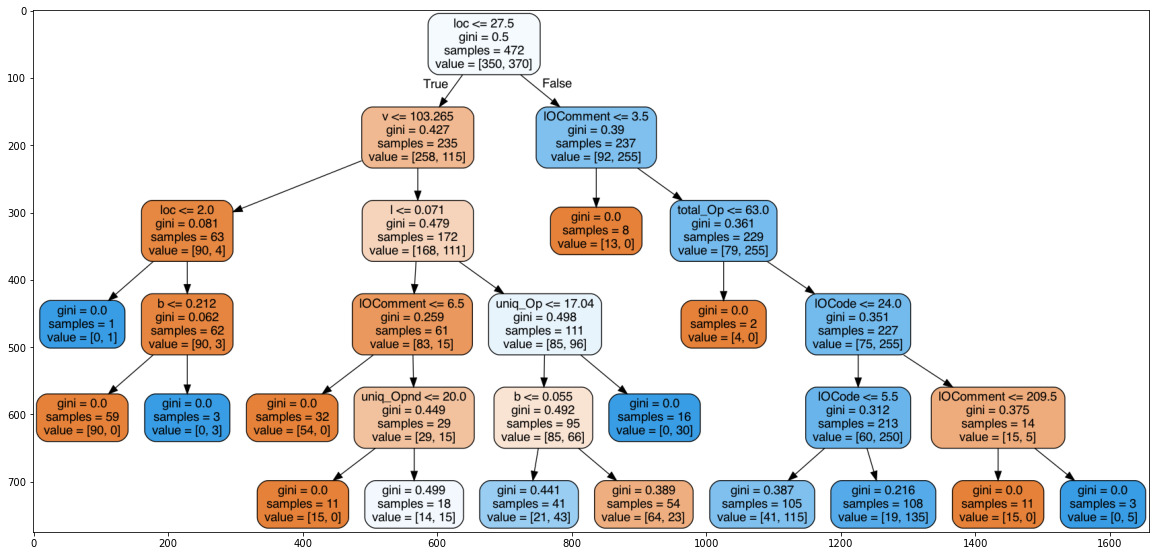

Test Accuracy of Random Forest 0.8625


In [68]:
random_forest('cm_rf')
display_tree('cm_rf')
test_rf_model('cm_rf', cm_X_val, cm_y_val)

In [69]:
svm('cm_svm')
test_svm_model('cm_svm', cm_X_val, cm_y_val)

Test Accuracy of SVC 0.6625


Epoch 1/100
45/45 [==============================] - 1s 5ms/step - loss: 1.2315 - accuracy: 0.5167 - val_loss: 0.6293 - val_accuracy: 0.4625
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.5750 - val_loss: 0.6195 - val_accuracy: 0.6875
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6347 - val_loss: 0.6216 - val_accuracy: 0.6625
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6250 - val_loss: 1.0196 - val_accuracy: 0.6500
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6194 - val_loss: 0.6129 - val_accuracy: 0.6500
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6278 - val_loss: 0.6106 - val_accuracy: 0.6500
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.6139 - val_loss: 0.6145 - val_accuracy: 0.6625
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6319 - val_loss: 0.5909 - val_accuracy: 0.6875
Epoch 60/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6292 - val_loss: 0.5776 - val_accuracy: 0.7000
Epoch 61/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6319 - val_loss: 0.5872 - val_accuracy: 0.6625
Epoch 62/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6333 - val_loss: 0.5868 - val_accuracy: 0.6625
Epoch 63/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6403 - val_loss: 0.5769 - val_accuracy: 0.7000
Epoch 64/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6417 - val_loss: 0.5859 - val_accuracy: 0.6625
Epoch 65/100
45/45 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.6444 - val_loss: 0.5808 - val_accuracy: 0.6875
Epoch 

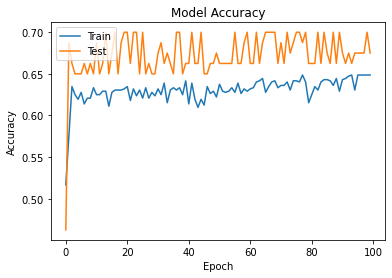

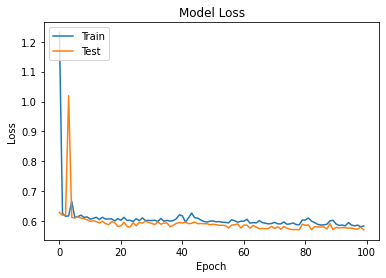

NameError: name 'cm_X_Val1' is not defined

In [70]:
cnn('cm_cnn', cm_X_val, cm_y_val)
test_cnn_model('cm_cnn', cm_X_Val1, cm_y_val)

In [77]:
# print accuracy of svm, random forest, nn, cnn
def print_accuracy(name, model, X_val, X_test, y_val, y_test): 
    if (model == ar_nn_model or model == cm_nn_model or model == kc_nn_model or model == mc_nn_model):
        y_pred_on_val = model.predict(X_val) > 0.5
        y_pred_on_test = model.predict(X_test) > 0.5
    elif (model == ar_cnn_model or model == cm_cnn_model or model == kc_cnn_model or model == mc_cnn_model):
        X_val_matrix = X_val.values
        X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], 1, len(X_val.columns), 1)
        y_pred_on_val = model.predict(X_val1) > 0.5
        X_test_matrix = X_test.values
        X_test1 = X_test_matrix.reshape(X_test_matrix.shape[0], 1, len(X_test.columns), 1)
        y_pred_on_test = model.predict(X_test1) > 0.5
    else:
        y_pred_on_val = model.predict(X_val)
        y_pred_on_test = model.predict(X_test)
        
    print('*****************', name, model, '*********************')   
    print('*****Validation Set*****')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('************************')
    print('*****Test Set*****')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('************************')
    print('')
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val.reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test.reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result

In [85]:
ar_svm_model = joblib.load("trained/ar_svm.h5")
ar_rf_model = joblib.load("trained/ar_rf.h5")
ar_nn_model = keras.models.load_model("trained/ar_nn.h5")
ar_cnn_model = keras.models.load_model("trained/ar_cnn.h5")

cm_svm_model = joblib.load("trained/cm_svm.h5")
cm_rf_model = joblib.load("trained/cm_rf.h5")
cm_nn_model = keras.models.load_model("trained/cm_nn.h5")
cm_cnn_model = keras.models.load_model("trained/cm_cnn.h5")

kc_svm_model = joblib.load("trained/kc_svm.h5")
kc_rf_model = joblib.load("trained/kc_rf.h5")
kc_nn_model = keras.models.load_model("trained/kc_nn.h5")
kc_cnn_model = keras.models.load_model("trained/kc_cnn.h5")

mc_svm_model = joblib.load("trained/mc_svm.h5")
mc_rf_model = joblib.load("trained/mc_rf.h5")
mc_nn_model = keras.models.load_model("trained/mc_nn.h5")
mc_cnn_model = keras.models.load_model("trained/mc_cnn.h5")

ar_svm_val_result, ar_svm_test_result = print_accuracy('AR Dataset', ar_svm_model, ar_X_val, ar_X_test, ar_y_val, ar_y_test)
ar_rf_val_result, ar_rf_test_result = print_accuracy('AR Dataset', ar_rf_model, ar_X_val, ar_X_test, ar_y_val, ar_y_test)
ar_nn_val_result, ar_nn_test_result = print_accuracy('AR Dataset', ar_nn_model, ar_X_val, ar_X_test, ar_y_val, ar_y_test)
ar_cnn_val_result, ar_cnn_test_result = print_accuracy('AR Dataset', ar_cnn_model, ar_X_val, ar_X_test, ar_y_val, ar_y_test)

cm_svm_val_result, cm_svm_test_result = print_accuracy('CM Dataset', cm_svm_model, cm_X_val, cm_X_test, cm_y_val, cm_y_test)
cm_rf_val_result, cm_rf_test_result = print_accuracy('CM Dataset', cm_rf_model, cm_X_val, cm_X_test, cm_y_val, cm_y_test)
cm_nn_val_result, cm_nn_test_result = print_accuracy('CM Dataset', cm_nn_model, cm_X_val, cm_X_test, cm_y_val, cm_y_test)
cm_cnn_val_result, cm_cnn_test_result = print_accuracy('CM Dataset', cm_cnn_model, cm_X_val, cm_X_test, cm_y_val, cm_y_test)

kc_svm_val_result, kc_svm_test_result = print_accuracy('KC Dataset', kc_svm_model, kc_X_val, kc_X_test, kc_y_val, kc_y_test)
kc_rf_val_result, kc_rf_test_result = print_accuracy('KC Dataset', kc_rf_model, kc_X_val, kc_X_test, kc_y_val, kc_y_test)
kc_nn_val_result, kc_nn_test_result = print_accuracy('KC Dataset', kc_nn_model, kc_X_val, kc_X_test, kc_y_val, kc_y_test)
kc_cnn_val_result, kc_cnn_test_result = print_accuracy('KC Dataset', kc_cnn_model, kc_X_val, kc_X_test, kc_y_val, kc_y_test)

mc_svm_val_result, mc_svm_test_result = print_accuracy('MC Dataset', mc_svm_model, mc_X_val, mc_X_test, mc_y_val, mc_y_test)
mc_rf_val_result, mc_rf_test_result = print_accuracy('MC Dataset', mc_rf_model, mc_X_val, mc_X_test, mc_y_val, mc_y_test)
mc_nn_val_result, mc_nn_test_result = print_accuracy('MC Dataset', mc_nn_model, mc_X_val, mc_X_test, mc_y_val, mc_y_test)
mc_cnn_val_result, mc_cnn_test_result = print_accuracy('MC Dataset', mc_cnn_model, mc_X_val, mc_X_test, mc_y_val, mc_y_test)


new_val_set_X = pd.concat([
    ar_svm_val_result['val_predict'],
    ar_rf_val_result['val_predict'],
    ar_nn_val_result['val_predict'],
    ar_cnn_val_result['val_predict'],
    cm_svm_val_result['val_predict'],
    cm_rf_val_result['val_predict'],
    cm_nn_val_result['val_predict'],
    cm_cnn_val_result['val_predict'],
    kc_svm_val_result['val_predict'],
    kc_rf_val_result['val_predict'],
    kc_nn_val_result['val_predict'],
    kc_cnn_val_result['val_predict'],
    mc_svm_val_result['val_predict'],
    mc_rf_val_result['val_predict'],
    mc_nn_val_result['val_predict'],
    mc_cnn_val_result['val_predict']
], axis=1)
new_val_set_X_matrix = new_val_set_X.values
new_val_set_y_matrix = kc_svm_val_result['val_actual'].values

new_test_set_X = pd.concat([
    ar_svm_test_result['test_predict'],
    ar_rf_test_result['test_predict'],
    ar_nn_test_result['test_predict'],
    ar_cnn_test_result['test_predict'],
    cm_svm_test_result['test_predict'],
    cm_rf_test_result['test_predict'],
    cm_nn_test_result['test_predict'],
    cm_cnn_test_result['test_predict'],
    kc_svm_test_result['test_predict'],
    kc_rf_test_result['test_predict'],
    kc_nn_test_result['test_predict'],
    kc_cnn_test_result['test_predict'],
    mc_svm_test_result['test_predict'],
    mc_rf_test_result['test_predict'],
    mc_nn_test_result['test_predict'],
    mc_cnn_test_result['test_predict']
], axis=1)
new_test_set_X_matrix = new_test_set_X.values
new_test_set_y_matrix = kc_svm_test_result['test_actual'].values


***************** AR Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.5714285714285714
Avg Precision: 0.5081967213114754
Precision: 0.5081967213114754
Recall: 1.0
************************
*****Test Set*****
Accuracy: 0.6025641025641025
Avg Precision: 0.11428571428571428
Precision: 0.11428571428571428
Recall: 1.0
************************

***************** AR Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.8516129032258064
Avg Precision: 0.7680351906158358
Precision: 0.8
Recall: 0.9032258064516129
************************
*****Test Set*****
Accuracy: 0.733974358974359
Avg Precision: 0.18397009966777406
Precision: 0.21428571428571427
Recall: 0.75
************************

***************** AR Dataset <keras.engine.sequential.Sequential object at 0x7fb8f18cb9d0> *********************
*****Validation Set*****
Accuracy: 0.7138248847926267
Avg Precision: 0.6231096544189

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************** CM Dataset <keras.engine.sequential.Sequential object at 0x7fb8c293f340> *********************
*****Validation Set*****
Accuracy: 0.6524198617221874
Avg Precision: 0.6264311270125223
Precision: 0.6307692307692307
Recall: 0.9534883720930233
************************
*****Test Set*****
Accuracy: 0.6326530612244898
Avg Precision: 0.02702702702702703
Precision: 0.02702702702702703
Recall: 1.0
************************

***************** KC Dataset SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.7886119257086999
Avg Precision: 0.6838263388531081
Precision: 0.6972111553784861
Recall: 0.9408602150537635
************************
*****Test Set*****
Accuracy: 0.8032478632478632
Avg Precision: 0.31549298654561814
Precision: 0.32456140350877194
Recall: 0.9487179487179487
************************

***************** KC Dataset RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.75

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
def ensemble_logistic_regression():
    model = LogisticRegression(random_state=0)
    model.fit(new_val_set_X_matrix, new_val_set_y_matrix)
    joblib.dump((model, new_test_set_X_matrix), "trained/ensemble.h5")
ensemble_logistic_regression()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
ensemble = joblib.load("trained/ensemble.h5")
prediction = ensemble[0].predict(ensemble[1])
print('Ensemble Accuracy:',accuracy_score(y_test.values, prediction))